# Crop Recommendation System - Model Evaluation
## Phase 2, Week 3

**Course:** CS316 - Introduction to AI and Data Science  
**Date:** October 24, 2025

## Objectives:
1. Evaluate the Random Forest model
2. Analyze errors and confusion matrix
3. Test predictions on sample inputs
4. Save the trained model

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data and Train Model

In [2]:
# Load dataset
df = pd.read_csv('crop_recommendation.csv')

# Prepare features and target
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1760 samples
Test set: 440 samples


In [3]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print("Model trained successfully!")

Model trained successfully!


## 3. Performance Metrics

In [4]:
# Calculate metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("-"*60)
print("Random Forest - Perfomance Metrics")
print("-"*60)
print(f"Training Accuracy:   {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy:       {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Precision:           {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:              {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:            {f1:.4f} ({f1*100:.2f}%)")
print(f"Overfitting:         {(train_acc - test_acc):.4f}")
print("-"*60)

------------------------------------------------------------
Random Forest - Perfomance Metrics
------------------------------------------------------------
Training Accuracy:   1.0000 (100.00%)
Test Accuracy:       0.9955 (99.55%)
Precision:           0.9957 (99.57%)
Recall:              0.9955 (99.55%)
F1-Score:            0.9955 (99.55%)
Overfitting:         0.0045
------------------------------------------------------------


## 4. Classification Report

In [5]:
print("-"*60)
print("CLASSIFICATION REPORT")
print("-"*60)
print(classification_report(y_test, y_pred_test))

------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00  

## 5. Confusion Matrix

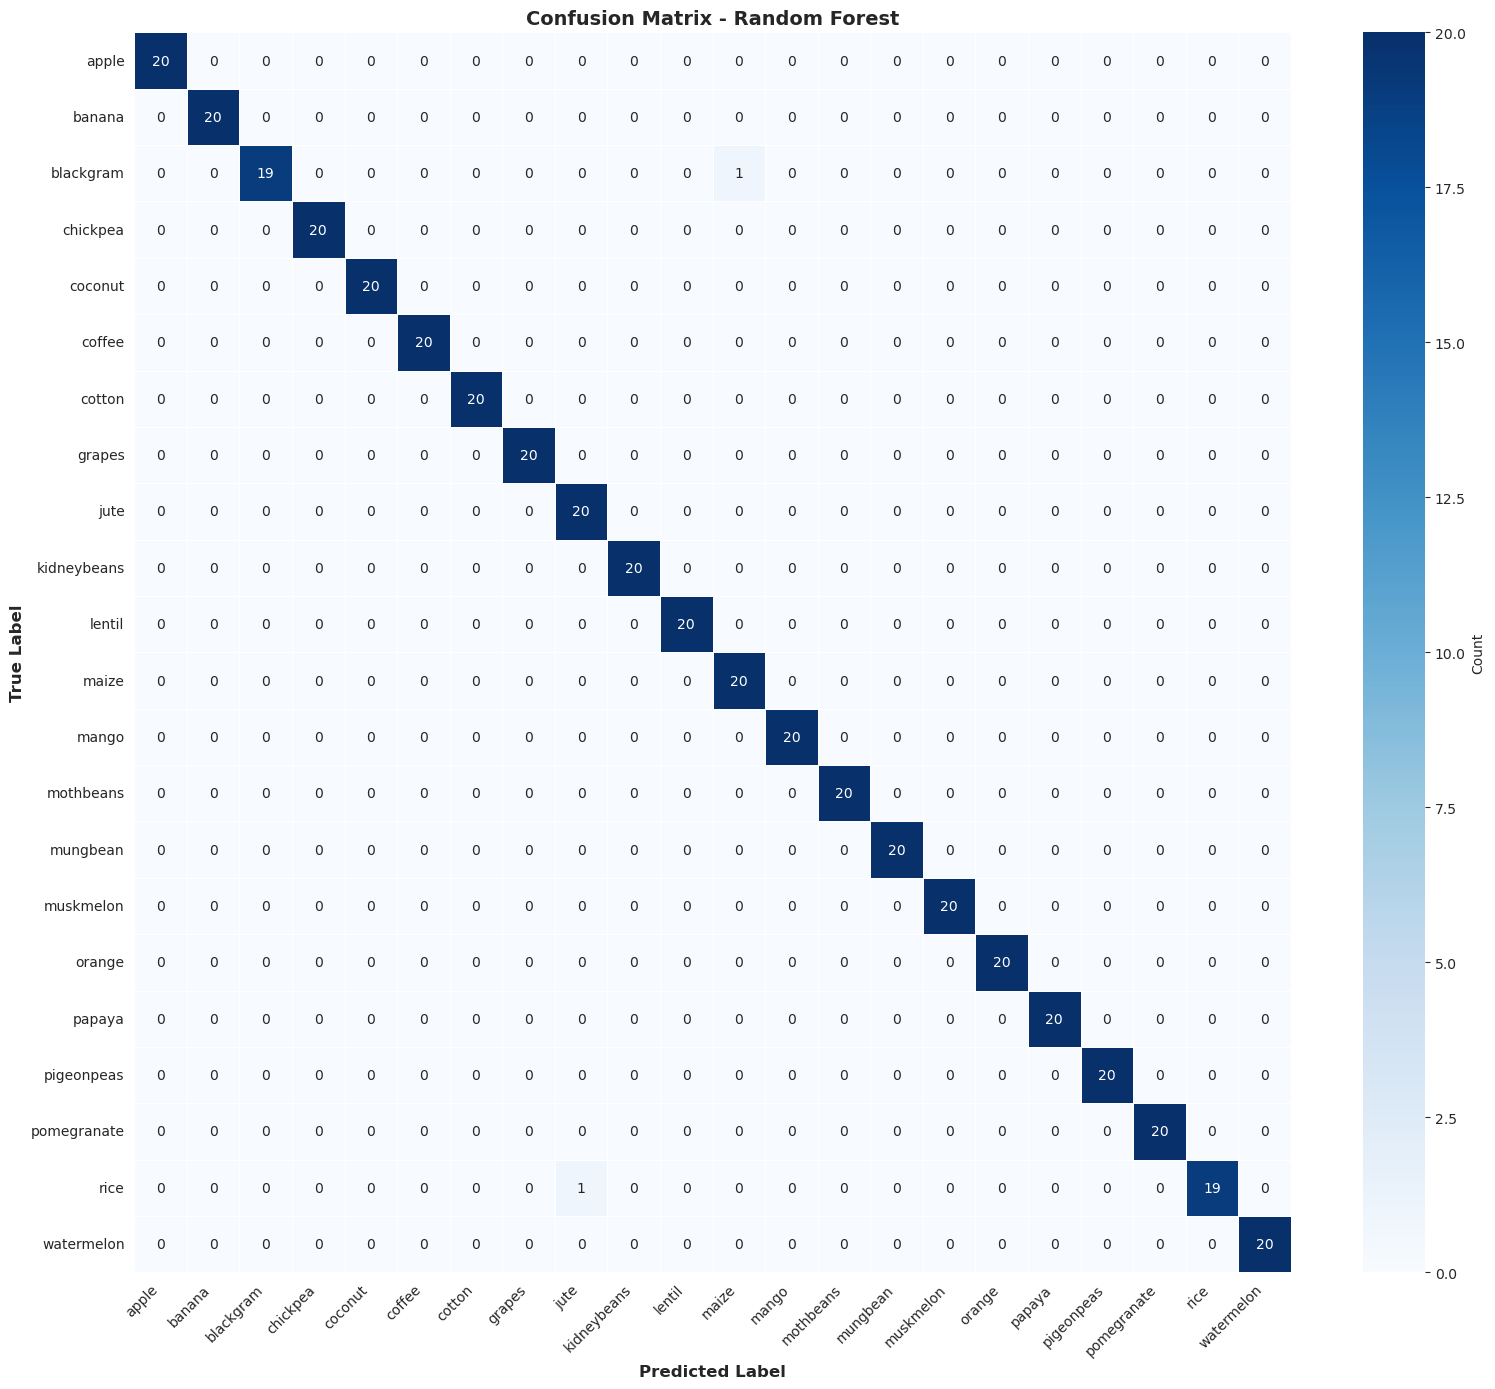

Confusion matrix saved as 'images/confusion_matrix.png'


In [6]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
crop_labels = sorted(y.unique())

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=crop_labels, yticklabels=crop_labels,
            cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix saved as 'images/confusion_matrix.png'")

## 6. Error Analysis

In [7]:
# Analyze misclassifications
misclassified_mask = y_test != y_pred_test
n_errors = misclassified_mask.sum()

print("-"*60)
print("Error Analysis")
print("-"*60)
print(f"Total test samples:      {len(y_test)}")
print(f"Correctly classified:    {len(y_test) - n_errors}")
print(f"Misclassified:           {n_errors}")
print(f"Error rate:              {n_errors / len(y_test) * 100:.2f}%")
print("-"*60)

if n_errors > 0:
    misclass_df = pd.DataFrame({
        'True Label': y_test[misclassified_mask].values,
        'Predicted Label': y_pred_test[misclassified_mask]
    })
    
    print(f"\nMost common misclassification pairs:")
    print(misclass_df.value_counts().head(5))
else:
    print("\nNo misclassifications found!")

------------------------------------------------------------
Error Analysis
------------------------------------------------------------
Total test samples:      440
Correctly classified:    438
Misclassified:           2
Error rate:              0.45%
------------------------------------------------------------

Most common misclassification pairs:
True Label  Predicted Label
blackgram   maize              1
rice        jute               1
Name: count, dtype: int64


## 7. Prediction Confidence

------------------------------------------------------------
Prediction Confidence
------------------------------------------------------------
Mean confidence:     0.9579
Median confidence:   0.9900
Min confidence:      0.5500
Max confidence:      1.0000
------------------------------------------------------------


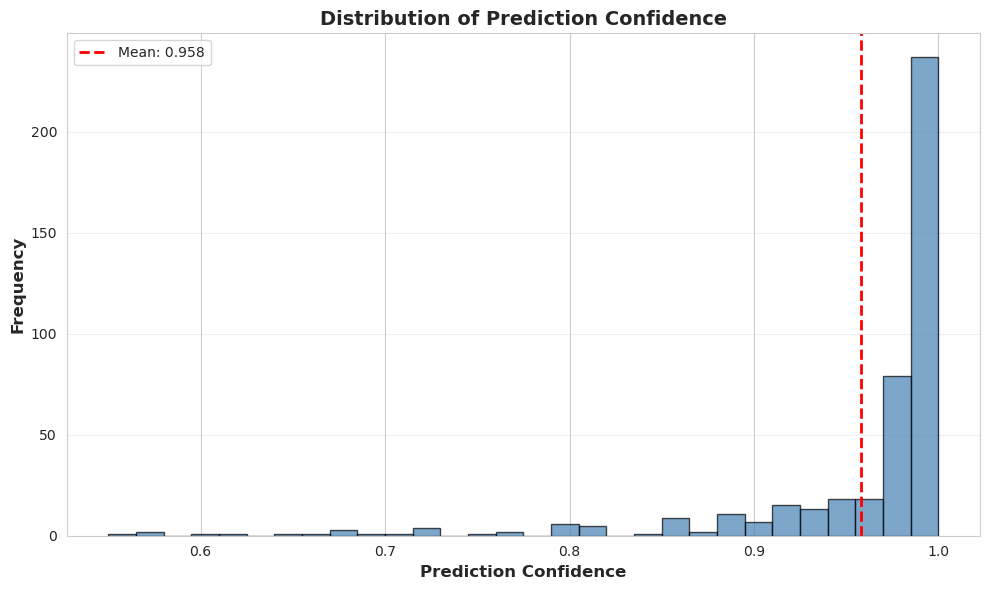

Confidence plot saved as 'images/prediction_confidence.png'


In [8]:
# Get prediction confidence
prediction_confidence = np.max(y_pred_proba, axis=1)

print("-"*60)
print("Prediction Confidence")
print("-"*60)
print(f"Mean confidence:     {prediction_confidence.mean():.4f}")
print(f"Median confidence:   {np.median(prediction_confidence):.4f}")
print(f"Min confidence:      {prediction_confidence.min():.4f}")
print(f"Max confidence:      {prediction_confidence.max():.4f}")
print("-"*60)

# Visualize confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(prediction_confidence, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(prediction_confidence.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {prediction_confidence.mean():.3f}')
plt.xlabel('Prediction Confidence', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Prediction Confidence', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/prediction_confidence.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confidence plot saved as 'images/prediction_confidence.png'")

## 8. Feature Importance

------------------------------------------------------------
Feature Importance
------------------------------------------------------------
    Feature  Importance
   rainfall    0.230184
   humidity    0.224227
          K    0.175393
          P    0.150850
          N    0.096363
temperature    0.072375
         ph    0.050608
------------------------------------------------------------


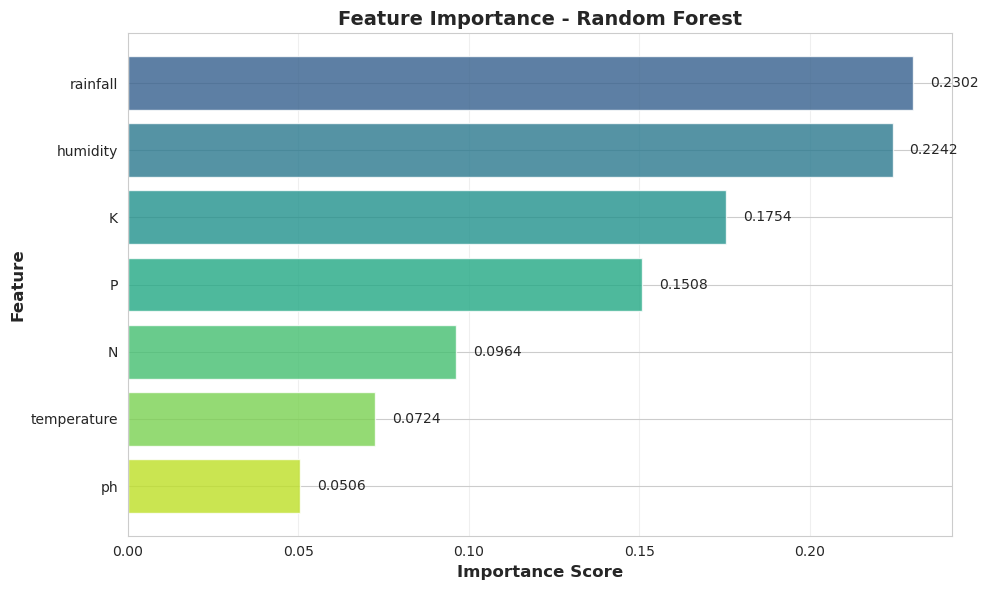

Feature importance plot saved as 'images/feature_importance.png'


In [9]:
# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("-"*60)
print("Feature Importance")
print("-"*60)
print(importance_df.to_string(index=False))
print("-"*60)

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors, alpha=0.8)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance plot saved as 'images/feature_importance.png'")

## 9. Sample Predictions

In [10]:
# Define prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict crop based on soil and environmental conditions
    """
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    })
    
    prediction = rf_model.predict(input_data)[0]
    probabilities = rf_model.predict_proba(input_data)[0]
    confidence = np.max(probabilities)
    
    print("-"*60)
    print("Crop Recommendation")
    print("-"*60)
    print(f"Nitrogen (N):        {N}")
    print(f"Phosphorus (P):      {P}")
    print(f"Potassium (K):       {K}")
    print(f"Temperature:         {temperature}°C")
    print(f"Humidity:            {humidity}%")
    print(f"pH:                  {ph}")
    print(f"Rainfall:            {rainfall}mm")
    print("\n" + "-"*60)
    print(f"Recommended Crop: {prediction}")
    print(f"Confidence: {confidence:.2%}")
    print("-"*60)
    
    return prediction, confidence

print("Prediction function created!")

Prediction function created!


In [11]:
# Test with sample inputs
print("\nExample 1: High rainfall conditions")
predict_crop(N=90, P=42, K=43, temperature=21, humidity=82, ph=6.5, rainfall=202)

print("\n" + "-"*60 + "\n")

print("Example 2: Cool temperature conditions")
predict_crop(N=20, P=135, K=205, temperature=18, humidity=75, ph=6.2, rainfall=105)

print("\n" + "-"*60 + "\n")

print("Example 3: High nitrogen conditions")
predict_crop(N=120, P=40, K=50, temperature=25, humidity=65, ph=7.5, rainfall=80)


Example 1: High rainfall conditions
------------------------------------------------------------
Crop Recommendation
------------------------------------------------------------
Nitrogen (N):        90
Phosphorus (P):      42
Potassium (K):       43
Temperature:         21°C
Humidity:            82%
pH:                  6.5
Rainfall:            202mm

------------------------------------------------------------
Recommended Crop: rice
Confidence: 90.00%
------------------------------------------------------------

------------------------------------------------------------

Example 2: Cool temperature conditions
------------------------------------------------------------
Crop Recommendation
------------------------------------------------------------
Nitrogen (N):        20
Phosphorus (P):      135
Potassium (K):       205
Temperature:         18°C
Humidity:            75%
pH:                  6.2
Rainfall:            105mm

-----------------------------------------------------------

('coffee', 0.37)

## 10. Save Model

In [12]:
# Save the trained model
model_filename = 'files/crop_recommendation_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved as '{model_filename}'")

# Test loading the model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Verify it works
test_sample = X_test.iloc[[0]]
original_pred = rf_model.predict(test_sample)[0]
loaded_pred = loaded_model.predict(test_sample)[0]

if original_pred == loaded_pred:
    print("Model loaded successfully and verified!")
else:
    print("Warning: Model verification failed")

Model saved as 'files/crop_recommendation_model.pkl'
Model loaded successfully and verified!


## 11. Summary

In [13]:
print("-"*60)
print("Project Summary")
print("-"*60)
print(f"Model:               Random Forest")
print(f"Test Accuracy:       {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Precision:           {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:              {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:            {f1:.4f} ({f1*100:.2f}%)")
print(f"Mean Confidence:     {prediction_confidence.mean():.4f}")
print(f"Total Crops:         {y.nunique()}")
print(f"Top Feature:         {importance_df.iloc[0]['Feature']}")
print("-"*60)

print("\nFiles Generated:")
print("  - images/confusion_matrix.png")
print("  - images/prediction_confidence.png")
print("  - images/feature_importance.png")
print("  - files/crop_recommendation_model.pkl")

print("\nProject completed successfully!")

------------------------------------------------------------
Project Summary
------------------------------------------------------------
Model:               Random Forest
Test Accuracy:       0.9955 (99.55%)
Precision:           0.9957 (99.57%)
Recall:              0.9955 (99.55%)
F1-Score:            0.9955 (99.55%)
Mean Confidence:     0.9579
Total Crops:         22
Top Feature:         rainfall
------------------------------------------------------------

Files Generated:
  - images/confusion_matrix.png
  - images/prediction_confidence.png
  - images/feature_importance.png
  - files/crop_recommendation_model.pkl

Project completed successfully!
